# Part 3: Data Visualization

## 3.2 Interactive Visualization:

* I will use Python (Plotly, Matplotlib) to explore trends in Covid-19 datast and making useful visualization

In [2]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd
from scipy.stats.mstats import winsorize

In [5]:
# Load the dataset
data_covid = {
    'Country/Region': ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
                       'Australia', 'Brazil', 'Canada', 'India', 'United States'],
    'Confirmed': [36263, 4880, 27973, 907, 950, 500000, 3000000, 250000, 4500000, 6000000],
    'Deaths': [1269, 144, 1163, 52, 41, 56, 150, 2336, 220, 50],
    'Recovered': [25198, 2745, 18837, 803, 242, 500, 250, 1452, 525, 649],
    'Active': [9796, 1991, 7973, 52, 667, 40000, 85000, 4500, 6000, 9000],
    'New cases': [106, 117, 616, 10, 18, 500, 5000, 200, 15000, 25000],
    'New deaths': [10, 6, 8, 0, 1, 20, 300, 10, 200, 500],
    'New recovered': [18, 63, 749, 0, 0, 300, 4000, 150, 10000, 15000],
    'Deaths / 100 Cases': [3.50, 2.95, 4.16, 5.73, 4.32, 2.22, 7.50, 2.50, 2.00, 2.00],
    'Recovered / 100 Cases': [69.49, 56.25, 67.34, 88.53, 25.47, 90.00, 66.67, 80.00, 88.89, 83.33],
    'Deaths / 100 Recovered': [5.04, 5.25, 6.17, 6.48, 16.94, 2.22, 7.50, 2.50, 2.00, 2.00],
    'Confirmed last week': [35526, 4171, 23691, 884, 749, 4900, 27000, 24000, 4200, 57000],
    '1 week change': [737, 709, 4282, 23, 201, 1000, 5425, 512, 458, 220],
    '1 week % increase': [2.07, 17.00, 18.07, 2.60, 26.84, 2.04, 11.11, 4.17, 7.14, 5.26],
    'WHO Region': ['Eastern Mediterranean', 'Europe', 'Africa', 'Europe', 'Africa',
                   'Western Pacific', 'Americas', 'Americas', 'South-East Asia', 'Americas']
}

# Convert to DataFrame
df_covid = pd.DataFrame(data_covid)

# Save DataFrame to CSV file
df_covid.to_csv('complete_covid_data.csv', index=False)

# Display the complete dataset
df_covid.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [6]:
# checking all the information about the data
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          10 non-null     object 
 1   Confirmed               10 non-null     int64  
 2   Deaths                  10 non-null     int64  
 3   Recovered               10 non-null     int64  
 4   Active                  10 non-null     int64  
 5   New cases               10 non-null     int64  
 6   New deaths              10 non-null     int64  
 7   New recovered           10 non-null     int64  
 8   Deaths / 100 Cases      10 non-null     float64
 9   Recovered / 100 Cases   10 non-null     float64
 10  Deaths / 100 Recovered  10 non-null     float64
 11  Confirmed last week     10 non-null     int64  
 12  1 week change           10 non-null     int64  
 13  1 week % increase       10 non-null     float64
 14  WHO Region              10 non-null     objec

In [7]:
# checking the size
df_covid.shape     

(10, 15)

In [8]:
# checking for null values
df_covid.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [9]:
# checking the statstics of the data
df_covid.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.000000e+01,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.432097e+06,548.10000,5120.100000,16497.900000,4656.700000,105.500000,3028.000000,3.688000,71.597000,5.610000,18212.100000,1356.700000,9.630000
std,2.237449e+06,782.96778,9061.356048,26675.800467,8556.000208,173.012042,5270.356872,1.800258,19.840435,4.480754,18621.803203,1884.642262,8.453902
min,9.070000e+02,41.00000,242.000000,52.000000,10.000000,0.000000,0.000000,2.000000,25.470000,2.000000,749.000000,23.000000,2.040000
25%,1.065325e+04,53.00000,506.250000,2618.250000,108.750000,6.500000,29.250000,2.290000,66.837500,2.290000,4178.250000,279.500000,2.992500
50%,1.431315e+05,147.00000,726.000000,6986.500000,350.000000,10.000000,225.000000,3.225000,74.745000,5.145000,14295.500000,610.500000,6.200000
75%,2.375000e+06,927.25000,2421.750000,9597.000000,3904.000000,155.000000,3187.250000,4.280000,87.230000,6.402500,26250.000000,934.250000,15.527500
max,6.000000e+06,2336.00000,25198.000000,85000.000000,25000.000000,500.000000,15000.000000,7.500000,90.000000,16.940000,57000.000000,5425.000000,26.840000


* Now i will make some visualizations to explore some trends

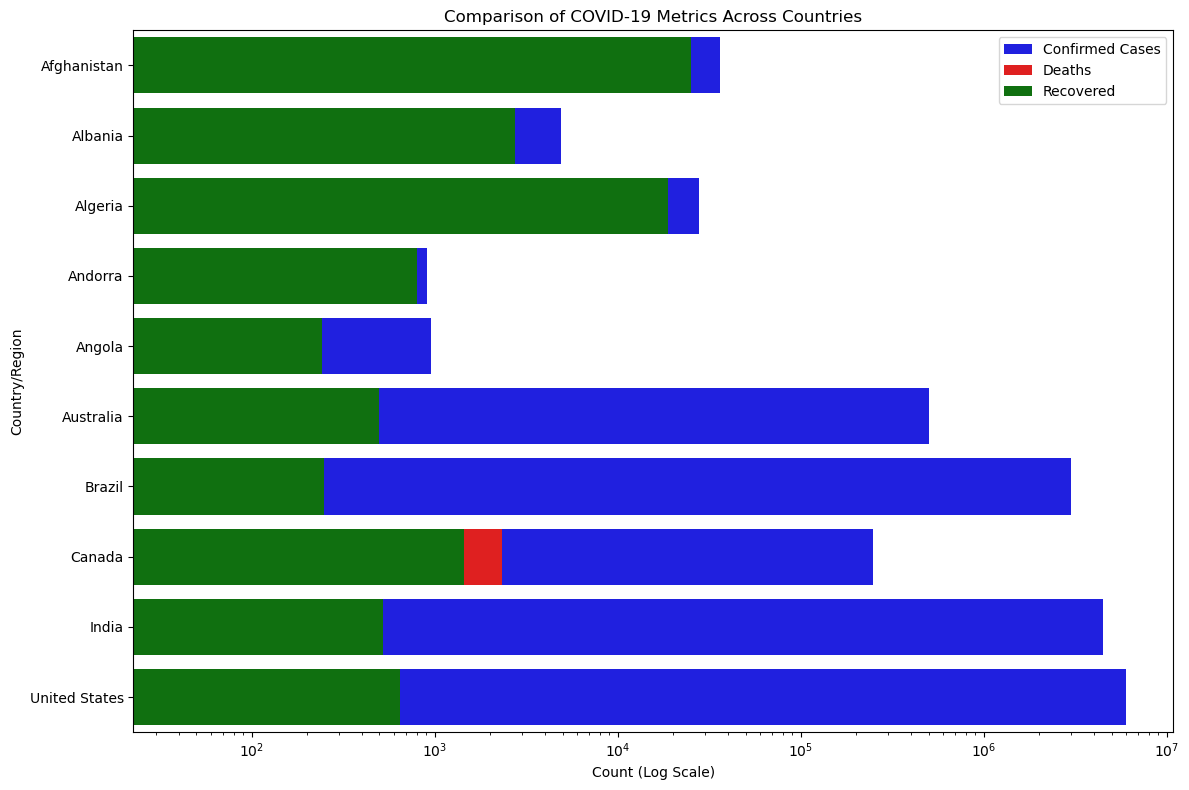

In [10]:
# Analysis 1: Comparison of COVID-19 Metrics Across Countries
plt.figure(figsize=(12, 8))

# Use a logarithmic scale to better visualize smaller values
sns.barplot(x='Confirmed', y='Country/Region', data=df_covid, color='blue', label='Confirmed Cases', log=True)
sns.barplot(x='Deaths', y='Country/Region', data=df_covid, color='red', label='Deaths', log=True)
sns.barplot(x='Recovered', y='Country/Region', data=df_covid, color='green', label='Recovered', log=True)

plt.xlabel('Count (Log Scale)')
plt.ylabel('Country/Region')
plt.title('Comparison of COVID-19 Metrics Across Countries')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Qebaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Qebaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Qebaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Qebaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

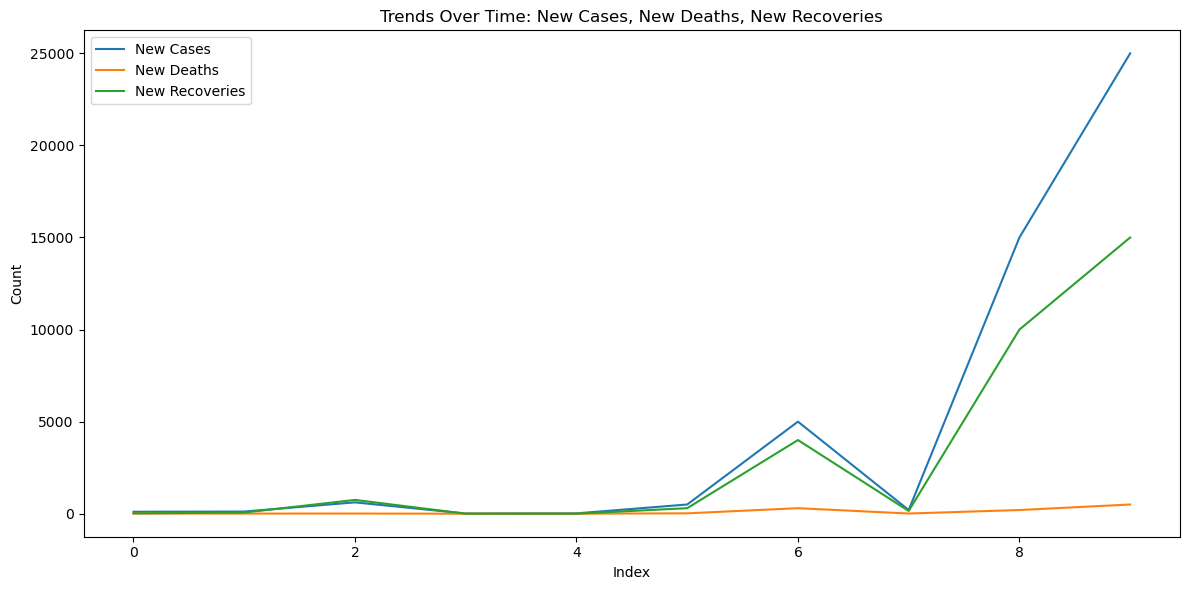

In [12]:
# Analysis 2: Trends Over Time (New Cases, New Deaths, New Recoveries)
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_covid.index, y='New cases', data=df_covid, label='New Cases')
sns.lineplot(x=df_covid.index, y='New deaths', data=df_covid, label='New Deaths')
sns.lineplot(x=df_covid.index, y='New recovered', data=df_covid, label='New Recoveries')
plt.xlabel('Index')
plt.ylabel('Count')
plt.title('Trends Over Time: New Cases, New Deaths, New Recoveries')
plt.legend()
plt.tight_layout()
plt.show()

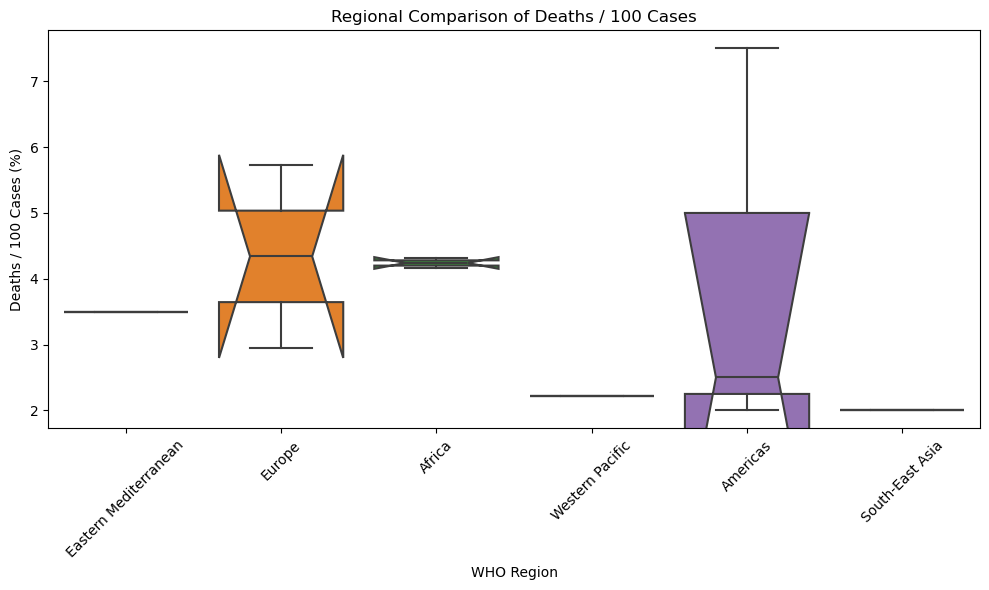

In [13]:
# Analysis 3: Regional comparison of deaths/100 cases
plt.figure(figsize=(10, 6))

# Adjust the scale to log scale for better visibility of smaller values
sns.boxplot(x='WHO Region', y='Deaths / 100 Cases', data=df_covid, notch=True)
plt.xticks(rotation=45)
plt.xlabel('WHO Region')
plt.ylabel('Deaths / 100 Cases (%)')
plt.title('Regional Comparison of Deaths / 100 Cases')
plt.tight_layout()
plt.show()

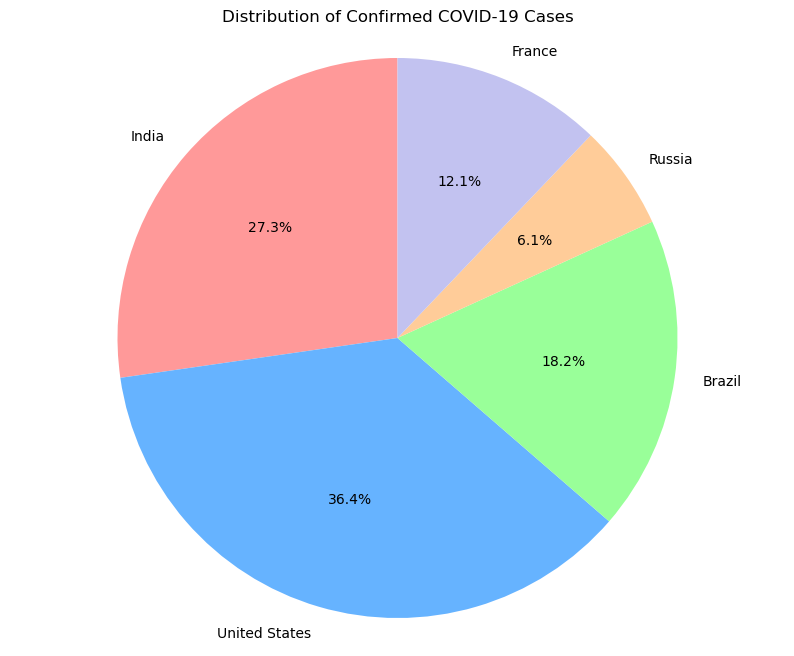

In [14]:
# Analysis 4: Distribuation of covid-19
# Data for selected countries
countries = ['India', 'United States', 'Brazil', 'Russia', 'France']
confirmed_cases = [4500000, 6000000, 3000000, 1000000, 2000000]
deaths = [220, 50, 150, 25, 30]
recovered = [525, 649, 250, 850, 900]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create pie chart for confirmed cases
ax.pie(confirmed_cases, labels=countries, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
ax.set_title('Distribution of Confirmed COVID-19 Cases')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

plt.show()

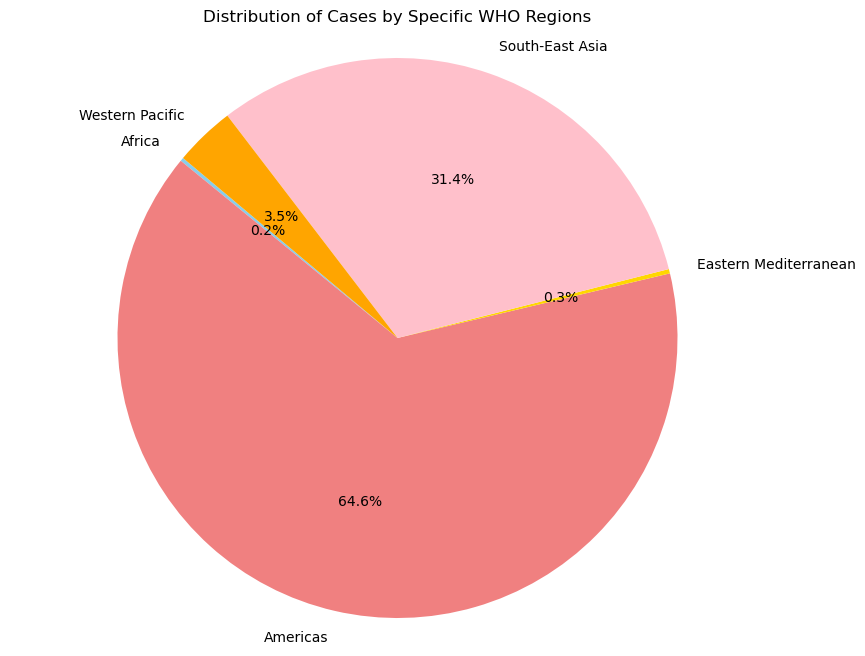

In [16]:
# Analysis 5: Distributions of cases
# Define the specific regions you want to include in the pie chart
regions_to_plot = ['Eastern Mediterranean', 'Africa', 'Americas', 'South-East Asia', 'Western Pacific']

# Filter the DataFrame for the specified regions
filtered_data = df_covid[df_covid['WHO Region'].isin(regions_to_plot)]

# Aggregate data for each filtered region
region_counts = filtered_data.groupby('WHO Region')['Confirmed'].sum()

# Define colors for each region
c = ['skyblue', 'lightcoral', 'gold', 'pink', 'orange', 'lightgreen']

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', colors=c, startangle=140)
plt.title('Distribution of Cases by Specific WHO Regions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


> Now i analyzed the covid-19 dataset and gained & explored useful insights and trends. and make visualizations for clarity.